Description

Problem Scenario: The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

Problem Objective:

As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.

Data Description:

This dataset contains data from Spotify's API about all albums for the Rolling Stones listed on Spotify. It is important to note that all songs have unique IDs.

Steps to Perform:
• Initial data inspection and data cleaning:
     o Check whether the data has duplicates, missing values, irrelevant(erroneous entries) values, or outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_file = 'C:\\Users\\KIM\\KSY WORK\\ML_ASSIGN\\Spotify\\1673873388_rolling_stones_spotify.xlsx'
dataset = pd.read_excel(data_file, index_col=0)

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 non-nu

In [3]:
dataset.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4          Donâ€™t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

In [4]:
dataset.describe()

release_date  track_number  acousticness  \
count                           1610   1610.000000   1610.000000   
mean   1992-04-23 12:57:14.534161536      8.613665      0.250475   
min              1964-04-16 00:00:00      1.000000      0.000009   
25%              1970-09-04 00:00:00      4.000000      0.058350   
50%              1986-03-24 00:00:00      7.000000      0.183000   
75%              2017-12-01 00:00:00     11.000000      0.403750   
max              2022-06-10 00:00:00     47.000000      0.994000   
std                              NaN      6.560220      0.227397   

       danceability       energy  instrumentalness    liveness     loudness  \
count   1610.000000  1610.000000       1610.000000  1610.00000  1610.000000   
mean       0.468860     0.792352          0.164170     0.49173    -6.971615   
min        0.104000     0.141000          0.000000     0.02190   -24.408000   
25%        0.362250     0.674000          0.000219     0.15300    -8.982500   
50%        0.458000     0.848500          0.013750     0.37950    -6.523000   
75%        0.578000     0.945000          0.179000     0.89375    -4.608750   
max        0.887000     0.999000          0.996000     0.99800    -1.014000   
std        0.141775     0.179886          0.276249     0.34910     2.994003   

       speechiness        tempo      valence   popularity    duration_ms  
count  1610.000000  1610.000000  1610.000000  1610.000000    1610.000000  
mean      0.069512   126.082033     0.582165    20.788199  257736.488199  
min       0.023200    46.525000     0.000000     0.000000   21000.000000  
25%       0.036500   107.390750     0.404250    13.000000  190613.000000  
50%       0.051200   124.404500     0.583000    20.000000  243093.000000  
75%       0.086600   142.355750     0.778000    27.000000  295319.750000  
max       0.624000   216.304000     0.974000    80.000000  981866.000000  
std       0.051631    29.233483     0.231253    12.426859  108333.474920

In [5]:
dataset[dataset.duplicated() == True]

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []

In [6]:
dataset[dataset.duplicated(subset=['id', 'uri', 'name', 'album']) == True]

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []

In [7]:
dataset[dataset.duplicated(subset=['id']) == True]

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []

In [8]:
dataset[dataset.duplicated(subset=['uri']) == True]

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []

There is no duplicated rows, id, and uri, name, album

In [9]:
# compare two strings  with length char_len in the string list with the length char_len
def get_strings_w_n_dup_chars(str_list, char_len) :
    dup_str_candidates = []
    for ch1 in str_list :       
        if (len(ch1) <= char_len) :
            break
        for ch2 in str_list :
            if ((ch1[:char_len] == ch2[:char_len]) & (ch2 not in dup_str_candidates) ) :
                dup_str_candidates.append(ch2)
    return dup_str_candidates

In [10]:
unique_album_name = dataset['album'].unique()
dup_candidates = get_strings_w_n_dup_chars(unique_album_name, 5)
dup_candidates[-10:]

['got LIVE if you want it!',
 'Got Live if you want it!',
 'Aftermath',
 'Aftermath (UK Version)',
 'Decemberâ€™s Children (And Everybodyâ€™s)',
 "December's Children (and everybody's)",
 'Out Of Our Heads',
 'Out Of Our Heads (US Sequence)',
 'Out Of Our Heads (UK Sequence)',
 'Out Of Our Heads (UK)']

There are erroneous album names which two list are same but regardes as different

In [11]:
# sort the album names which first 6 characters are same and examin
unique_album_name = dataset['name'].unique()
dup_candidates = get_strings_w_n_dup_chars(unique_album_name, 6)
dup_candidates[100:110]

["Can't You Hear Me Knocking - 2009 Mix",
 "Can't You Hear Me Knocking - Alternate Version",
 'Honky Tonk Women - Live',
 'Honky Tonk Women - Live At The El Mocambo 1977',
 'Honky Tonk Women - Live at Wembley Stadium 1982',
 'Honky Tonk Women - Live / Forest National Arena, Brussels / 17/10/73',
 'Honky Tonk Woman - Live',
 'Honky Tonk Women - Live At Madison Square Garden, USA / 2003',
 'Honky Tonk Women - Live Licks Tour - 2009 Re-Mastered Digital Version',
 'Honky Tonk Women - Live / Remastered 2009']

Erroneous song name which two list are same but regardes as different i.e. 
'Honky Tonk Woman - Live',
'Honky Tonk Women - Live',
'Dancing With Mr D',
'Dancing With Mr. D',
'Jumpin Jack Flash - Live',
"Jumpin' Jack Flash - Live"

In [12]:
# plan to remove space, special characters in album names, 
# sort and compare the strings with specifed percentage of characters

def compare_alpha_num (check_string_list) :
    ret_df = pd.DataFrame(columns=["string1", "string2"])
    for i in range(len(check_string_list)) :
        for j in range(i+1, len(check_string_list)) :
            s1 = check_string_list[i]
            s2 = check_string_list[j]
            if s1 != s2 :
                string1 = s1.lower().replace(' ', '')
                string2 = s2.lower().replace(' ', '')            
                if (string1 == string2) :
                    ret_df = pd.concat([ret_df, 
                                     pd.DataFrame(columns=['string1', 'string2'], data = [[s1, s2]])], ignore_index=True)

    return ret_df

In [13]:
unique_album_name = dataset['album'].unique()
unique_album_name

array(['Licked Live In NYC', 'Live At The El Mocambo',
       'Tattoo You (Super Deluxe)', 'Tattoo You', 'A Bigger Bang (Live)',
       'Steel Wheels Live', 'Goats Head Soup (Deluxe)',
       'Bridges To Buenos Aires (Live)', 'Bridges To Bremen (Live)',
       'Honk (Deluxe)', 'Voodoo Lounge Uncut (Live)',
       'From The Vault: No Security - San Jose 1999 (Live)', 'On Air',
       'On Air (Deluxe)', 'Sticky Fingers Live At The Fonda Theatre',
       'Ladies & Gentlemen (Live)', 'Blue & Lonesome',
       'Havana Moon (Live)', 'Totally Stripped - Brixton (Live)',
       'Totally Stripped - Amsterdam (Live)', 'Totally Stripped (Live)',
       'Totally Stripped - Paris (Live)',
       'Live 1965: Music From Charlie Is My Darling (Live From England/1965)',
       'Live At The Checkerboard Lounge', "Some Girls: Live In Texas '78",
       'A Bigger Bang (2009 Re-Mastered)', 'Live Licks',
       'Bridges To Babylon', 'Bridges To Babylon (Remastered)',
       'Stripped', 'Voodoo Lounge (Remas

In [14]:
ret = compare_alpha_num (unique_album_name)
ret

string1                   string2
0  got LIVE if you want it!  Got Live if you want it!
1                    12 x 5                    12 X 5

In [15]:
unique_song_name = dataset['name'].unique()
ret = compare_alpha_num (unique_song_name)
ret

string1                     string2
0  Get Off Of My Cloud - Live  Get Off of My Cloud - Live
1         Faraway Eyes - Live        Far Away Eyes - Live

There are erroneous album names which two list are same but regardes as different.
There are some lowercase/uppercase is mixed by mistake for the same album, and considered as different albums.

In [16]:
# remove space, special characters in album names, sort and compare the specified percentage of characters
# examin if str1 is substring of str2

def check_similar_sub_strings (check_string_list, str1_percent, str2_percent, missmatch_rate) :
    ret_df = pd.DataFrame(columns=["string1", "string2"])
    for i in range(len(check_string_list)) :
        for j in range(i+1, len(check_string_list)) :
            s1 = check_string_list[i]
            s2 = check_string_list[j]
            if s1 != s2 :
                # remove space
                string1 = s1.lower().replace(' ', '')
                string2 = s2.lower().replace(' ', '')            
                # remove special characters
                string1 = remove_special_char(string1)
                string2 = remove_special_char(string2)
                # check if specified percentage of string substring
                ret = check_substring_w_percentage(string1, string2, str1_percent, str2_percent, missmatch_rate)
                if (ret==True) :
                    ret_df = pd.concat([ret_df, 
                                     pd.DataFrame(columns=['string1', 'string2'], data = [[s1, s2]])], ignore_index=True)
                    
#    ret_df = ret_df.groupby(['string1'], sort=True).apply(lambda x:x)
    return ret_df

In [17]:
# remove space, special characters in album names, sort and compare the specified percentage of characters
# examin if str1 is substring of str2

def check_similar_strings_w_nchar (check_string_list, str1_percent, str2_percent, n_char) :
    ret_df = pd.DataFrame(columns=["string1", "string2"])
    for i in range(len(check_string_list)) :
        for j in range(i+1, len(check_string_list)) :
            s1 = check_string_list[i]
            s2 = check_string_list[j]
            if s1 != s2 :
                # remove space
                string1 = s1.lower().replace(' ', '')
                string2 = s2.lower().replace(' ', '')            
                # remove special characters
                string1 = remove_special_char(string1)
                string2 = remove_special_char(string2)
                # check if specified percentage of string substring
                ret = check_substring_w_nchar(string1, string2, str1_percent, str2_percent, n_char)
                if (ret==True) :
                    ret_df = pd.concat([ret_df,
                               pd.DataFrame(columns=['string1', 'string2'], data = [[s1, s2]])], ignore_index=True)
                    
    #ret_df = ret_df.groupby(['string1'], sort=True).apply(lambda x:x)
    return ret_df

In [18]:
def remove_special_char(string) :
    new_string = string
    for c in string :
        if (c.isdigit() == False) & (c.isalpha() == False) :
            new_string = new_string.replace(c, "")
    return new_string


In [19]:
# check characters one by one with specified percentage and specified missmatch rate
def check_substring_w_percentage(str1, str2, str1_percent, str2_percent, missmatch_rate) :
    matched_idx = 0
    matched_cnt = 0

    len1 = len(str1)
    len2 = len(str2)  
    
    n_per_len1 = (len1 * str1_percent) // 100 - int((len1 * str1_percent / 100) * (missmatch_rate / 100))
    n_per_len2 = (len2 * str2_percent) // 100 - int((len2 * str2_percent / 100) * (missmatch_rate / 100))
    
    if len1 < len2 :
        if len1 < n_per_len2 :
            return False
    else :
        if len2 < n_per_len1 :
            return False

    #compare each character in str1
    for i in range(len(str1)) :
        ret =  str2[matched_idx:].find(str1[i])
        if ret == -1 :
            if (i == 0) & (matched_cnt == 0) :
                return False
        elif ((len1-i-1) < (n_per_len1-matched_cnt-1)) | ((len2-matched_idx-1) < (n_per_len2-matched_cnt-1)) :
            break
        else :
            matched_cnt += 1
            matched_idx = matched_idx + ret + 1
    if (matched_cnt >= n_per_len1) & (matched_cnt >= n_per_len2):
        return True
    else :
        return False


In [20]:
# check characters one by one with specified percentage and specified # of characters
def check_substring_w_nchar(str1, str2, str1_percent, str2_percent, n_char) :
    matched_idx = 0
    matched_cnt = 0

    len1 = len(str1)
    len2 = len(str2)  
    
    n_per_len1 = (len1 * str1_percent) // 100 - n_char
    n_per_len2 = (len2 * str2_percent) // 100 - n_char
    
    n_miss_char = n_char
    if len1 < len2 :
        if len1 < n_per_len2 :
            return False
    else :
        if len2 < n_per_len1 :
            return False
    #compare each character in str1
    for i in range(len(str1)) :
        if str1[i] != str2[matched_idx] :
            if (i == 0) & (matched_cnt == 0) :
                return False
            elif n_miss_char > 0 :
                matched_idx = matched_idx+1
                n_miss_char = n_miss_char-1
        elif ((len1-i-1) < (n_per_len1-matched_cnt-1)) | ((len2-matched_idx-1) < (n_per_len2-matched_cnt-1)) :
            break
        else :
            matched_cnt = matched_cnt + 1
            matched_idx = matched_idx + 1
        if matched_idx >= len2 :
            break;
            
    if (matched_cnt >= n_per_len1) & (matched_cnt >= n_per_len2):
        return True
    else :
        return False


In [21]:
ret = check_similar_strings_w_nchar(unique_album_name, 95, 95, 2)
ret

string1  \
0                 Love You Live (Remastered)   
1                   got LIVE if you want it!   
2  Decemberâ€™s Children (And Everybodyâ€™s)   
3                           Out Of Our Heads   
4             Out Of Our Heads (US Sequence)   
5                   The Rolling Stones, Now!   
6                   The Rolling Stones, Now!   
7                   The Rolling Stones No. 2   
8                                     12 x 5   
9               Englandâ€™s Newest Hitmakers   

                                 string2  
0        Love You Live (Remastered 2009)  
1               Got Live if you want it!  
2  December's Children (and everybody's)  
3                  Out Of Our Heads (UK)  
4         Out Of Our Heads (UK Sequence)  
5               The Rolling Stones No. 2  
6                     The Rolling Stones  
7                     The Rolling Stones  
8                                 12 X 5  
9            England's Newest Hit Makers

These are the candidates of erroneous entires for the column album

In [22]:
unique_song_name = dataset['name'].unique()
ret = check_similar_sub_strings(unique_song_name, 95, 95, 5)
ret

string1  \
0                        You Got Me Rocking - Live   
1                   It's Only Rock 'N' Roll - Live   
2                         Jumpin Jack Flash - Live   
3                         Jumpin Jack Flash - Live   
4                    Start Me Up - Remastered 2021   
5            Waiting On A Friend - Remastered 2021   
6                      Jumpinâ€™ Jack Flash - Live   
7   It's Only Rock 'N' Roll (But I Like It) - Live   
8   It's Only Rock 'N' Roll (But I Like It) - Live   
9                       Get Off Of My Cloud - Live   
10       You Can't Always Get What You Want - Live   
11                               Dancing With Mr D   
12   It's Only Rock 'N Roll (But I Like It) - Live   
13                             Faraway Eyes - Live   
14                           Instrumental 1 - Live   

                                          string2  
0                     You Got Me Rockinâ€™ - Live  
1                   It's Only Rock 'n Roll - Live  
2                     Jumpinâ€™ Jack Flash - Live  
3                       Jumpin' Jack Flash - Live  
4                   Start Me Up - Remastered 2009  
5           Waiting On A Friend - Remastered 2009  
6                       Jumpin' Jack Flash - Live  
7   It's Only Rock 'N Roll (But I Like It) - Live  
8    It's Only Rock N Roll (But I Like It) - Live  
9                      Get Off of My Cloud - Live  
10    You Canâ€™t Always Get What You Want - Live  
11                             Dancing With Mr. D  
12   It's Only Rock N Roll (But I Like It) - Live  
13                           Far Away Eyes - Live  
14                          Instrumental 2 - Live

These are the candidates of errones entries for the column 'name'

In [23]:
# check missing values

dataset.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

There is no missing values

In [24]:
# check if there are erroneous data input

check_cols=['name', 'album', 'release_date']
for i in check_cols :
    np.sort(dataset[i].unique())

In [25]:
def is_df_contain_str(dataset, col_name, string) :
    ret = dataset[dataset[col_name].str.find(string) > -1][col_name]
    return ret

In [26]:
#dataset[dataset['name'].str.contains(pat='â€™')]['name'].head()
is_df_contain_str(dataset, 'name', 'â€™').head()

4                                   Donâ€™t Stop - Live
30          Crackinâ€™ Up - Live At The El Mocambo 1977
39    Itâ€™s Only Rock â€™Nâ€™ Roll (But I Like It) ...
42    Jumpinâ€™ Jack Flash - Live At The El Mocambo ...
59                                  Troubles Aâ€™ Comin
Name: name, dtype: object

In [27]:
is_df_contain_str(dataset, 'album', 'â€™').head()

1442    Decemberâ€™s Children (And Everybodyâ€™s)
1443    Decemberâ€™s Children (And Everybodyâ€™s)
1444    Decemberâ€™s Children (And Everybodyâ€™s)
1445    Decemberâ€™s Children (And Everybodyâ€™s)
1446    Decemberâ€™s Children (And Everybodyâ€™s)
Name: album, dtype: object

found some erroneous entries in the columns name and album :
'I Canâ€™t Turn You Loose - Live', 'Troubles Aâ€™ Comin' etc.

In [28]:
dataset.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

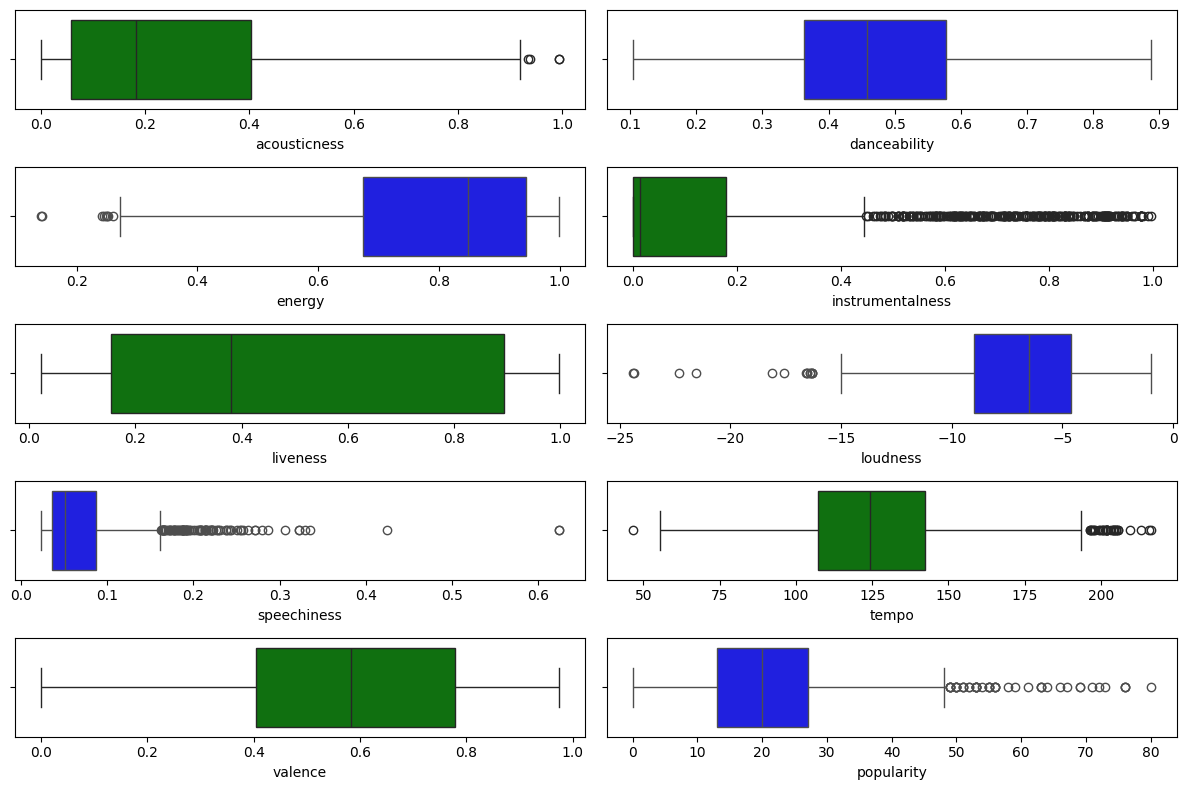

In [29]:
# check outliers for numerical variables

# exclude track_number and duration_ms from outliers detection
numerical_cols=['acousticness', 'danceability', 
                'energy', 'instrumentalness', 'liveness', 'loudness', 
                'speechiness','tempo', 'valence', 'popularity']

def plot_for_subplot(col_names, color, nrows, ncols) :
    total = len(col_names)
    n = 0
    plt_bar = list(range(total))
    plt.figure(figsize=(10,10))
    fig, axe = plt.subplots(nrows, ncols, figsize=(12,8))

    for i in (range(nrows)) :
        for j in (range(ncols)) :    
            plt_bar[n] = sns.boxplot(x=dataset[col_names[n]], 
                                     color=color[np.mod(n+i, ncols)], ax=axe[i][j])
            n = n + 1
            if n == total :
                break
    plt.tight_layout()


plot_for_subplot(numerical_cols, ['g', 'b', 'm'], 5, 2)

In [30]:
# Check outliers
def detect_outliers_iqr_df(full_dataframe):
# parameter full_data : DataFrame
# returns outliers : List

# column list for column types integer or float
    numeric_col_list = []

    # compute for outliers only for numeric columns
    for i in (range(len(full_dataframe.dtypes))) :
        if pd.Series(full_dataframe.dtypes.values[i].name).str.contains('float')[0] or pd.Series(full_dataframe.dtypes.values[i].name).str.contains('int')[0] :
            numeric_col_list.append(full_dataframe.dtypes.index[i])

    data=pd.DataFrame(full_dataframe[numeric_col_list])
    for each_col in data :
        outliers_dict = dict(zip(data.columns, data.index))
    # data[each_col] : series of numeric columned dataframe
    for each_col in data :
        outliers=[]
        data[each_col]=sorted(data[each_col])

        q1=np.percentile(data[each_col],25)
        q3=np.percentile(data[each_col],75)
    
        iqr=q3-q1
    
        lwr=q1-(1.5*iqr)
        upr=q3+(1.5*iqr)
    
        for i in data[each_col]:
            if (i < lwr or i > upr):
                outliers.append(i)
        outliers_dict.update({each_col:outliers})
                
    return outliers_dict


outliers_val = detect_outliers_iqr_df(dataset)
keys = outliers_val.keys()
print("Outliers are")
for k in keys :
    print("Column : {:20s} Count : {:3d}   Percentage : {:.2f} %".format(k, len(outliers_val[k]), len(outliers_val[k])/dataset.shape[0]*100))
outliers_sum = 0
for k in keys :
    outliers_sum = outliers_sum+len(outliers_val[k])
print("Total Count : {:d}, Total Percentage : {:.2f} %".format(outliers_sum, outliers_sum/dataset.shape[0]*100))

Outliers are
Column : track_number         Count :  77   Percentage : 4.78 %
Column : acousticness         Count :   4   Percentage : 0.25 %
Column : danceability         Count :   0   Percentage : 0.00 %
Column : energy               Count :   8   Percentage : 0.50 %
Column : instrumentalness     Count : 272   Percentage : 16.89 %
Column : liveness             Count :   0   Percentage : 0.00 %
Column : loudness             Count :  14   Percentage : 0.87 %
Column : speechiness          Count :  92   Percentage : 5.71 %
Column : tempo                Count :  34   Percentage : 2.11 %
Column : valence              Count :   0   Percentage : 0.00 %
Column : popularity           Count :  48   Percentage : 2.98 %
Column : duration_ms          Count :  76   Percentage : 4.72 %
Total Count : 625, Total Percentage : 38.82 %


Steps to Perform:
• Depending on your findings, clean the data for further processing.

In [31]:
# clean erroneous entries for name column
err_df = dataset[dataset['name'].str.contains(pat='â€™')]['name']

for i in err_df.index :
    org = dataset['name'].loc[i]
    mod = pd.Series(org).str.replace('â€™','\'')
    dataset['name'].loc[i] = mod[0]

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\1855890798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['name'].loc[i] = mod[0]
C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\1855890798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['name'].loc[i] = mod[0]
C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\1855890798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['name'].loc[i] = mod[0]
C:\Users\K

In [32]:
is_df_contain_str(dataset, 'name', 'â€™').head()

Series([], Name: name, dtype: object)

In [33]:
dataset.loc[30, 'name']

"Crackin' Up - Live At The El Mocambo 1977"

erroneous entries 'â€™' for name column cleaned

In [34]:
is_df_contain_str(dataset, 'album', 'â€™').head()

1442    Decemberâ€™s Children (And Everybodyâ€™s)
1443    Decemberâ€™s Children (And Everybodyâ€™s)
1444    Decemberâ€™s Children (And Everybodyâ€™s)
1445    Decemberâ€™s Children (And Everybodyâ€™s)
1446    Decemberâ€™s Children (And Everybodyâ€™s)
Name: album, dtype: object

In [35]:
# clean erroneous entries for name column
err_df = dataset[dataset['album'].str.contains(pat='â€™')]['album']

for i in err_df.index :
    org = dataset['album'].loc[i]
    mod = pd.Series(org).str.replace('â€™','\'')
    dataset['album'].loc[i] = mod[0]

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\3387408267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['album'].loc[i] = mod[0]
C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\3387408267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['album'].loc[i] = mod[0]
C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\3387408267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['album'].loc[i] = mod[0]
C:\User

In [36]:
is_df_contain_str(dataset, 'album', 'â€™').head()

Series([], Name: album, dtype: object)

In [37]:
dataset.loc[1442, 'album']

"December's Children (And Everybody's)"

erroneous entries 'â€™' for album cleaned

Clean data which is mistakenly input lower/uppercase charachers of special characters etc.

In [38]:
unique_album_name = dataset['album'].unique()
ret = check_similar_sub_strings(unique_album_name, 90, 95, 10)
ret

string1  \
0       Totally Stripped - Brixton (Live)   
1              Love You Live (Remastered)   
2                got LIVE if you want it!   
3   December's Children (And Everybody's)   
4                        Out Of Our Heads   
5          Out Of Our Heads (US Sequence)   
6                The Rolling Stones, Now!   
7                The Rolling Stones, Now!   
8                The Rolling Stones No. 2   
9                                  12 x 5   
10             England's Newest Hitmakers   

                                  string2  
0         Totally Stripped - Paris (Live)  
1         Love You Live (Remastered 2009)  
2                Got Live if you want it!  
3   December's Children (and everybody's)  
4                   Out Of Our Heads (UK)  
5          Out Of Our Heads (UK Sequence)  
6                The Rolling Stones No. 2  
7                      The Rolling Stones  
8                      The Rolling Stones  
9                                  12 X 5  
10            England's Newest Hit Makers

the values of the index 1, 2, 3, 9 are erroneous

In [39]:
# Clean data of the column 'album' which was input mistakenly and integrated two album names to one,
# using mean values of the nemuric columns 

category_cols = ['name', 'album', 'release_date', 'track_number', 'id', 'uri']
numeric_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']

def correct_err_album_values(dataset_name, dataset_column_name, delete_col, standard_col) :
    mode_col = [delete_col, standard_col]

    mode_df = dataset_name[dataset_name[dataset_column_name].str.find(mode_col[0]) > -1]
    mode_df = pd.concat([mode_df, dataset_name[dataset_name[dataset_column_name].str.find(mode_col[1]) > -1]])
    # mode_df.groupby(['track_number'])['track_number'].count() != 2 error

    standard_df = dataset_name[dataset_name[dataset_column_name].str.find(mode_col[1]) > -1][category_cols]
    standard_df = standard_df.reset_index()
    standard_df.drop('index', axis=1, inplace=True)
    appended_df = mode_df[['track_number']+numeric_cols].groupby('track_number')[numeric_cols].mean()
    appended_df = appended_df.reset_index()
    standard_df.drop('track_number', axis=1, inplace=True)
    standard_df = standard_df.join(other=appended_df)
    for x in mode_col :
        remove_df = dataset_name[dataset_name[dataset_column_name].str.find(x) > -1]
        dataset_name.drop(index=remove_df.index, inplace=True)
    dataset_name = pd.concat([dataset_name, standard_df], ignore_index=True)
    return dataset_name

In [40]:
error_list = [['12 x 5', '12 X 5'], ["England\'s Newest Hitmakers", "England\'s Newest Hit Makers"],
              ['got LIVE if you want it!', 'Got Live if you want it!'],
              ["December\'s Children (and everybody\'s)", "December\'s Children (And Everybody\'s)"]]

for i in range(len(error_list)) :
    dataset = correct_err_album_values(dataset, 'album', error_list[i][0], error_list[i][1])
    print(dataset.shape)
    print("After deletion of error list : ", len(is_df_contain_str(dataset, 'album', error_list[i][0])))
    print("result row count of appended list : ", len(is_df_contain_str(dataset, 'album', error_list[i][1])))

(1598, 17)
After deletion of error list :  0
result row count of appended list :  12
(1586, 17)
After deletion of error list :  0
result row count of appended list :  12
(1574, 17)
After deletion of error list :  0
result row count of appended list :  12
(1562, 17)
After deletion of error list :  0
result row count of appended list :  12


for i in range(len(error_list)) :
    print("After DELETION : null")
    print(is_df_contain_str(dataset, 'album', error_list[i][0]))
    print("APPENDED :")
    print(is_df_contain_str(dataset, 'album', error_list[i][1]))

Data of the column 'album' was cleaned

In [41]:
# find erroneous entries 99% of the first string 99% of the second string with 2 unmatched charachters
# in the column 'name'
unique_song_name = dataset['name'].unique()
ret_check_string = check_similar_strings_w_nchar(unique_song_name, 99, 99, 1)

In [42]:
ret_check_string

string1  \
0                        You Got Me Rocking - Live   
1                          Honky Tonk Women - Live   
2                   It's Only Rock 'N' Roll - Live   
3                         Jumpin Jack Flash - Live   
4                    Start Me Up - Remastered 2021   
5            Waiting On A Friend - Remastered 2021   
6   It's Only Rock 'N' Roll (But I Like It) - Live   
7   It's Only Rock 'N' Roll (But I Like It) - Live   
8                       Get Off Of My Cloud - Live   
9                                Dancing With Mr D   
10   It's Only Rock 'N Roll (But I Like It) - Live   
11                             Faraway Eyes - Live   
12                           Instrumental 1 - Live   

                                          string2  
0                       You Got Me Rockin' - Live  
1                         Honky Tonk Woman - Live  
2                   It's Only Rock 'n Roll - Live  
3                       Jumpin' Jack Flash - Live  
4                   Start Me Up - Remastered 2009  
5           Waiting On A Friend - Remastered 2009  
6   It's Only Rock 'N Roll (But I Like It) - Live  
7    It's Only Rock N Roll (But I Like It) - Live  
8                      Get Off of My Cloud - Live  
9                              Dancing With Mr. D  
10   It's Only Rock N Roll (But I Like It) - Live  
11                           Far Away Eyes - Live  
12                          Instrumental 2 - Live

In [43]:
idx = [1]
error_list = []
for i in ret_check_string.index :
    for j in idx :
        if (i == j) :
            error_list.append([ret_check_string.loc[i].string1, ret_check_string.loc[i].string2])
error_list

[['Honky Tonk Women - Live', 'Honky Tonk Woman - Live']]

In [44]:
ret_check_string = check_similar_sub_strings(unique_song_name, 90, 90, 10)

In [45]:
ret_check_string

string1  \
0                          Street Fighting Man - Live   
1                           You Got Me Rocking - Live   
2                      It's Only Rock 'N' Roll - Live   
3                       Sympathy For The Devil - Live   
4                            Jumpin Jack Flash - Live   
5                       Start Me Up - Remastered 2021   
6                       Start Me Up - Remastered 2021   
7                         Hang Fire - Remastered 2021   
8                        Little T&A - Remastered 2021   
9                   Black Limousine - Remastered 2021   
10                       Neighbours - Remastered 2021   
11                Worried About You - Remastered 2021   
12                 No Use In Crying - Remastered 2021   
13              Waiting On A Friend - Remastered 2021   
14              Waiting On A Friend - Remastered 2021   
15     It's Only Rock 'N' Roll (But I Like It) - Live   
16     It's Only Rock 'N' Roll (But I Like It) - Live   
17     It's Only Rock 'N' Roll (But I Like It) - Live   
18                         Get Off Of My Cloud - Live   
19          You Can't Always Get What You Want - Live   
20                     Undercover Of The Night - Live   
21                       Rock And A Hard Place - Live   
22          Doo Doo Doo Doo Doo (Heartbreaker) - 2020   
23          Doo Doo Doo Doo Doo (Heartbreaker) - 2020   
24                      Can You Hear The Music - 2020   
25                                  Dancing With Mr D   
26                 Doo Doo Doo Doo Doo (Heartbreaker)   
27  Angie - Live / Forest National Arena, Brussels...   
28              Let's Spend The Night Together - Live   
29                       Anybody Seen My Baby? - Live   
30              It's Only Rock'n'Roll (But I Like It)   
31              It's Only Rock'n'Roll (But I Like It)   
32                     Come On - Saturday Club / 1963   
33  Everybody Needs Somebody To Love - Top Gear / ...   
34      It's Only Rock 'N Roll (But I Like It) - Live   
35                                Faraway Eyes - Live   
36            Everybody Needs Somebody To Love - Live   
37            Everybody Needs Somebody To Love - Live   
38                        Down The Road Apiece - Live   
39                              Instrumental 1 - Live   
40               Undercover Of The Night - Remastered   
41                           Start Me Up - Remastered   
42                   Waiting On A Friend - Remastered   
43  It's Only Rock'n'Roll (But I Like It) - Remast...   
44                             Sing This All Together   
45          Sing This All Together (See What Happens)   
46                         2000 Light Years From Home   
47  Have You Seen Your Mother, Baby, Standing In T...   
48  Everybody Needs Somebody To Love - Version 2 -...   

                                              string2  
0                                 Street Fighting Man  
1                           You Got Me Rockin' - Live  
2                       It's Only Rock 'n Roll - Live  
3                              Sympathy For The Devil  
4                           Jumpin' Jack Flash - Live  
5                            Start Me Up - Remastered  
6                       Start Me Up - Remastered 2009  
7                              Hang Fire - Remastered  
8                             Little T&A - Remastered  
9                        Black Limousine - Remastered  
10                            Neighbours - Remastered  
11                     Worried About You - Remastered  
12                      No Use In Crying - Remastered  
13                   Waiting On A Friend - Remastered  
14              Waiting On A Friend - Remastered 2009  
15              It's Only Rock'n'Roll (But I Like It)  
16      It's Only Rock 'N Roll (But I Like It) - Live  
17       It's Only Rock N Roll (But I Like It) - Live  
18                         Get Off of My Cloud - Live  
19                 You Can't Always Get What You Want  
20                 

In [46]:
# Correct the rows of the index idx, idx2, and examin the rows of the index idx3
idx = [1, 2, 4, 18, 25, 34, 35]
idx2 = [16, 17]
idx3 = [43, 47, 48]

for i in ret_check_string.index :
    for j in idx :
        if i == j :
            error_list.append([ret_check_string.loc[i].string1, ret_check_string.loc[i].string2])
        
error_list


[['Honky Tonk Women - Live', 'Honky Tonk Woman - Live'],
 ['You Got Me Rocking - Live', "You Got Me Rockin' - Live"],
 ["It's Only Rock 'N' Roll - Live", "It's Only Rock 'n Roll - Live"],
 ['Jumpin Jack Flash - Live', "Jumpin' Jack Flash - Live"],
 ['Get Off Of My Cloud - Live', 'Get Off of My Cloud - Live'],
 ['Dancing With Mr D', 'Dancing With Mr. D'],
 ["It's Only Rock 'N Roll (But I Like It) - Live",
  "It's Only Rock N Roll (But I Like It) - Live"],
 ['Faraway Eyes - Live', 'Far Away Eyes - Live']]

In [47]:
def is_df_match_str(dataset, col_name, string) :
    ret = dataset[dataset[col_name] == string][col_name]
    return ret

In [48]:
for i in range(len(error_list)) :
    dataset.loc[dataset[dataset['name'] == error_list[i][0]].index, 'name'] = error_list[i][1]

for i in range(len(error_list)) :
    print(is_df_match_str(dataset, 'name', error_list[i][0]))
    print(is_df_match_str(dataset, 'name', error_list[i][1]))

In [49]:
def get_error_list (idx, df_str_pair) :
    error_list = []
    for i in df_str_pair.index :
        for j in idx :
            if i == j :
                error_list.append([df_str_pair.loc[i].string1, df_str_pair.loc[i].string2])
    return error_list
        
error_list = get_error_list(idx2, ret_check_string)
error_list

[["It's Only Rock 'N' Roll (But I Like It) - Live",
  "It's Only Rock 'N Roll (But I Like It) - Live"],
 ["It's Only Rock 'N' Roll (But I Like It) - Live",
  "It's Only Rock N Roll (But I Like It) - Live"]]

In [50]:
is_df_contain_str(dataset, 'name', "It\'s Only Rock \'N\' Roll (But I Like It) - Live")

39     It's Only Rock 'N' Roll (But I Like It) - Live...
105       It's Only Rock 'N' Roll (But I Like It) - Live
148       It's Only Rock 'N' Roll (But I Like It) - Live
194       It's Only Rock 'N' Roll (But I Like It) - Live
223       It's Only Rock 'N' Roll (But I Like It) - Live
305       It's Only Rock 'N' Roll (But I Like It) - Live
333       It's Only Rock 'N' Roll (But I Like It) - Live
961       It's Only Rock 'N' Roll (But I Like It) - Live
979    It's Only Rock 'N' Roll (But I Like It) - Live...
Name: name, dtype: object

In [51]:
is_df_contain_str(dataset, 'name', "It\'s Only Rock \'N Roll (But I Like It) - Live")

Series([], Name: name, dtype: object)

In [52]:
is_df_contain_str(dataset, 'name', "It\'s Only Rock N Roll (But I Like It) - Live")

451    It's Only Rock N Roll (But I Like It) - Live
543    It's Only Rock N Roll (But I Like It) - Live
Name: name, dtype: object

In [53]:
for i in range(len(error_list)) :
    dataset.loc[dataset[dataset['name'] == error_list[i][1]].index, 'name'] = error_list[i][0]

In [54]:
is_df_contain_str(dataset, 'name', "It\'s Only Rock \'N\' Roll (But I Like It) - Live")

39     It's Only Rock 'N' Roll (But I Like It) - Live...
105       It's Only Rock 'N' Roll (But I Like It) - Live
148       It's Only Rock 'N' Roll (But I Like It) - Live
194       It's Only Rock 'N' Roll (But I Like It) - Live
223       It's Only Rock 'N' Roll (But I Like It) - Live
305       It's Only Rock 'N' Roll (But I Like It) - Live
333       It's Only Rock 'N' Roll (But I Like It) - Live
451       It's Only Rock 'N' Roll (But I Like It) - Live
543       It's Only Rock 'N' Roll (But I Like It) - Live
961       It's Only Rock 'N' Roll (But I Like It) - Live
979    It's Only Rock 'N' Roll (But I Like It) - Live...
Name: name, dtype: object

All erroneous song names were corrected

In [55]:
error_list = get_error_list(idx3, ret_check_string)
error_list

[["It's Only Rock'n'Roll (But I Like It) - Remastered 2009",
  "It's Only Rock 'n' Roll (But I Like It) - Remastered"],
 ['Have You Seen Your Mother, Baby, Standing In The Shadow? - Mono Version',
  'Have You Seen Your Mother, Baby, Standing In The Shadow? - Live'],
 ['Everybody Needs Somebody To Love - Version 2 - short',
  'Everybody Needs Somebody To Love - Long Version']]

Above song names are not erroneous

In [56]:
# double-chekc if there are still erroneous strings
# all strings which are not matched 2 characters in 99% of total the length
unique_song_name = dataset['name'].unique()
ret_check_string = check_similar_strings_w_nchar(unique_song_name, 99, 99, 2)

In [57]:
ret_check_string

string1  \
0          Start Me Up - Remastered 2021   
1  Waiting On A Friend - Remastered 2021   
2                            Little Rain   
3                  Instrumental 1 - Live   

                                 string2  
0          Start Me Up - Remastered 2009  
1  Waiting On A Friend - Remastered 2009  
2                             Little T&A  
3                  Instrumental 2 - Live

There are no more erroneous strings in the dataset

In [58]:
# Total outliers are quite large as 38.82%, so impute outliers with mean values

outliers_val.keys()

dict_keys(['track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'])

In [59]:
for i in outliers_val.keys() :
    for j in range(0, len(outliers_val[i])) :
        dataset.loc[dataset[i] == outliers_val[i][j], i] = dataset[i].mean()

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\2238934804.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.678617157490397' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset[i] == outliers_val[i][j], i] = dataset[i].mean()


outliers are imputed with mean values

In [60]:
dataset.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10           1.0   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10           2.0   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10           3.0   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10           4.0   
4            Don't Stop - Live  Licked Live In NYC   2022-06-10           5.0   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.064218     0.932   -12.913     0.110000   
1         0.326   0.965          0.233000     0.961    -4.803     0.075900   
2         0.386   0.969          0.400000     0.956    -4.936     0.115000   
3         0.369   0.985          0.000107     0.895    -5.535     0.067172   
4         0.303   0.969          0.055900     0.966    -5.098     0.093000   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302        33.0      48640.0  
1  131.455   0.3180        34.0     253173.0  
2  130.066   0.3130        34.0     263160.0  
3  132.994   0.1470        32.0     305880.0  
4  130.533   0.2060        32.0     305106.0

In [61]:
outliers_val = detect_outliers_iqr_df(dataset)

In [62]:
pd.Series(np.sort(dataset['album'].unique()))

0                               12 X 5
1     A Bigger Bang (2009 Re-Mastered)
2                 A Bigger Bang (Live)
3                            Aftermath
4               Aftermath (UK Version)
                    ...               
81     Totally Stripped - Paris (Live)
82                          Undercover
83       Undercover (2009 Re-Mastered)
84     Voodoo Lounge (Remastered 2009)
85          Voodoo Lounge Uncut (Live)
Length: 86, dtype: object

Steps to Perform:
• Perform Exploratory Data Analysis and Feature Engineering:

  o Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.

In [63]:
dataset.groupby('name')['name'].count().head(10)

name
(I Can't Get No) Satisfaction - Live                                                        8
(I Can't Get No) Satisfaction - Live / Remastered 2009                                      2
(I Can't Get No) Satisfaction - Live At Death Valley Stadium, South Carolina, USA / 1989    1
(I Can't Get No) Satisfaction - Live At Madison Square Garden, USA / 2003                   1
(I Can't Get No) Satisfaction - Live At University Of Leeds / 1971                          1
(I Can't Get No) Satisfaction - Live From Madison Square Garden, New York/1969              1
(I Can't Get No) Satisfaction - Live Licks Tour / Remastered 2009                           1
(I Can't Get No) Satisfaction - Live at Wembley Stadium 1982                                1
(I Can't Get No) Satisfaction - Mono Version                                                2
(I Can't Get No) Satisfaction - Saturday Club / 1965                                        2
Name: name, dtype: int64

Above shows there exists duplicated songs in different albums

In [64]:
# compute mean popularity of each song
song_popularity = pd.DataFrame(dataset.groupby('name')['popularity'].mean().sort_values(ascending=False))
song_popularity.head()

popularity
name                                         
Anybody Seen My Baby?                    48.0
Out Of Time                              46.0
Miss You                                 46.0
Streets Of Love - Remastered 2009        45.0
Little T&A - Remastered                  45.0

In [65]:
# grouping all song names in each abulm
album = dataset[['album', 'name']].groupby(by = ['album', 'name']).count()

In [66]:
album.head()

Empty DataFrame
Columns: []
Index: [(12 X 5, 2120 South Michigan Avenue - Long Version), (12 X 5, Around And Around), (12 X 5, Confessin' The Blues), (12 X 5, Congratulations - Mono Version), (12 X 5, Empty Heart)]

In [67]:
# mean populrity for each album based on all songs' popularity in the album
album = album.join(song_popularity['popularity'], on='name')

In [68]:
album = album.reset_index()

In [69]:
album.head()

album                                       name  popularity
0  12 X 5  2120 South Michigan Avenue - Long Version        15.0
1  12 X 5                          Around And Around        21.0
2  12 X 5                       Confessin' The Blues        19.5
3  12 X 5             Congratulations - Mono Version        15.5
4  12 X 5                                Empty Heart        14.0

In [70]:
# Count the number of populr songs to recommed two albums based on the number of popular song
# First, compute each song's popularity
songs = dataset[['name', 'popularity']].groupby('name').mean().reset_index()
songs.head()

name  popularity
0               (I Can't Get No) Satisfaction - Live     17.4375
1  (I Can't Get No) Satisfaction - Live / Remaste...     24.0000
2  (I Can't Get No) Satisfaction - Live At Death ...      5.0000
3  (I Can't Get No) Satisfaction - Live At Madiso...      7.0000
4  (I Can't Get No) Satisfaction - Live At Univer...     20.0000

In [71]:
popularity_median = dataset['popularity'].median()
popularity_median

20.0

In [72]:
# dataframe of popolar songs that popularity is more than median value
popular_songs = songs[songs['popularity'] > popularity_median]
popular_songs['popularity'].sort_values(ascending=False)[:5]

54     48.0
529    46.0
587    46.0
777    45.0
758    45.0
Name: popularity, dtype: float64

In [73]:
# join songs and their popularities for the album names
popular_album = dataset[['album','name']]
popular_album = popular_album.join(popular_songs.set_index('name'), on='name', how='right')

In [74]:
popular_album.head()

album  \
770                                          Flashpoint   
849                                          Still Life   
1217  Get Yer Ya-Ya's Out! The Rolling Stones In Con...   
669                                          Live Licks   
1424                                   Out Of Our Heads   

                                                   name  popularity  
770   (I Can't Get No) Satisfaction - Live / Remaste...   24.000000  
849   (I Can't Get No) Satisfaction - Live / Remaste...   24.000000  
1217  (I Can't Get No) Satisfaction - Live From Madi...   22.000000  
669   (I Can't Get No) Satisfaction - Live Licks Tou...   36.000000  
1424       (I Can't Get No) Satisfaction - Mono Version   32.525676

In [75]:
popular_album.isna().sum()

album         0
name          0
popularity    0
dtype: int64

In [76]:
popular_album.shape

(651, 3)

In [77]:
popular_album['popularity'].sort_values(ascending=False)[:5]

671     48.0
240     46.0
1412    46.0
1292    45.0
865     45.0
Name: popularity, dtype: float64

In [78]:
# Top 5 albums based on the number of popular songs
# First, compute each song's popularity
album_popularity = popular_album.groupby('album')['name'].count().sort_values(ascending=False).to_frame().reset_index()
top5album_by_songcnt = album_popularity.head(5)
top5album_by_songcnt.rename({'name':'popular_song_count'}, axis=1, inplace=True)
top5album_by_songcnt

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\3185703519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5album_by_songcnt.rename({'name':'popular_song_count'}, axis=1, inplace=True)


album  popular_song_count
0                          Honk (Deluxe)                  39
1               Goats Head Soup (Deluxe)                  25
2                 Live At The El Mocambo                  23
3            Some Girls (Deluxe Version)                  22
4  Exile On Main Street (Deluxe Version)                  18

In [79]:
top5album_by_songcnt['popular_song_count'].sort_values(ascending=False)

0    39
1    25
2    23
3    22
4    18
Name: popular_song_count, dtype: int64

In [80]:
top5album_by_songcnt['rank'] = top5album_by_songcnt.index + 1

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\3552549634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5album_by_songcnt['rank'] = top5album_by_songcnt.index + 1


In [81]:
top5album_by_songcnt

album  popular_song_count  rank
0                          Honk (Deluxe)                  39     1
1               Goats Head Soup (Deluxe)                  25     2
2                 Live At The El Mocambo                  23     3
3            Some Girls (Deluxe Version)                  22     4
4  Exile On Main Street (Deluxe Version)                  18     5

In [82]:
# Compare above top5 songs with Top 5 albums based on the mean values of popular songs
top5album_by_mean =popular_album.groupby('album')['popularity'].mean().sort_values(ascending=False).to_frame().reset_index().head(5)
top5album_by_mean.rename({'popularity':'album_popularity'}, axis=1, inplace=True)
top5album_by_mean

album  album_popularity
0                                    Beggars Banquet         45.000000
1              December's Children (And Everybody's)         37.500000
2  Let It Bleed (50th Anniversary Edition / Remas...         35.224143
3         Beggars Banquet (50th Anniversary Edition)         34.861057
4                      Tattoo You (2009 Re-Mastered)         34.734178

In [83]:
top5album_by_mean['rank'] = top5album_by_mean.index + 1
top5album_by_mean

album  album_popularity  rank
0                                    Beggars Banquet         45.000000     1
1              December's Children (And Everybody's)         37.500000     2
2  Let It Bleed (50th Anniversary Edition / Remas...         35.224143     3
3         Beggars Banquet (50th Anniversary Edition)         34.861057     4
4                      Tattoo You (2009 Re-Mastered)         34.734178     5

In [84]:
df_result = dataset[['album','name','popularity']]
top5album_by_songcnt = top5album_by_songcnt.join(df_result.set_index('album'), on='album', how='left')
top5album_by_songcnt.head()

album  popular_song_count  rank                         name  \
0  Honk (Deluxe)                  39     1       Living In A Ghost Town   
0  Honk (Deluxe)                  39     1                  Start Me Up   
0  Honk (Deluxe)                  39     1               Doom And Gloom   
0  Honk (Deluxe)                  39     1  Brown Sugar - 2009 Remaster   
0  Honk (Deluxe)                  39     1              Beast Of Burden   

   popularity  
0   41.000000  
0   42.000000  
0   21.017286  
0   26.000000  
0   42.000000

In [85]:
top5album_by_songcnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album               179 non-null    object 
 1   popular_song_count  179 non-null    int64  
 2   rank                179 non-null    int64  
 3   name                179 non-null    object 
 4   popularity          179 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.4+ KB


In [86]:
top5album_by_songcnt.isna().sum()

album                 0
popular_song_count    0
rank                  0
name                  0
popularity            0
dtype: int64

In [87]:
top5album_by_songcnt[top5album_by_songcnt['popularity'] == 0]

album  popular_song_count  rank  \
0  Honk (Deluxe)                  39     1   

                                                name  popularity  
0  Beast Of Burden - Live At Arrowhead Stadium, K...         0.0

In [88]:
top5album_by_mean = df_result.join(top5album_by_mean.set_index('album'), on='album', how='right')
top5album_by_mean.head()

album                    name  popularity  album_popularity  \
1267  Beggars Banquet  Sympathy For The Devil        45.0              45.0   
1268  Beggars Banquet         No Expectations        12.0              45.0   
1269  Beggars Banquet             Dear Doctor         8.0              45.0   
1270  Beggars Banquet         Parachute Woman         9.0              45.0   
1271  Beggars Banquet           Jigsaw Puzzle         8.0              45.0   

      rank  
1267     1  
1268     1  
1269     1  
1270     1  
1271     1

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\2926002229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=top5album_by_songcnt, x='rank', y='popularity', palette='Set2')


<Figure size 700x500 with 0 Axes>

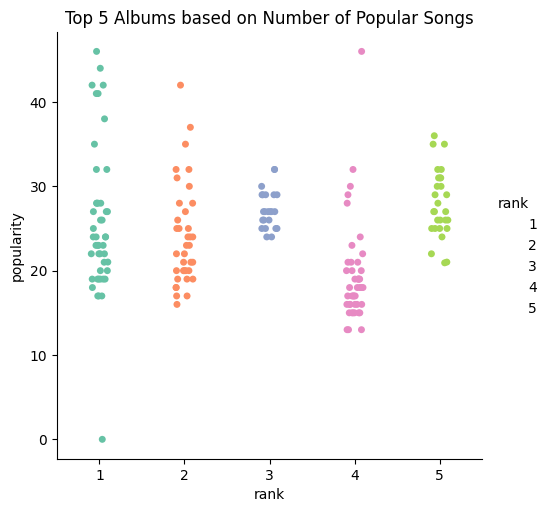

In [89]:
plt.figure(figsize=(7, 5))
sns.catplot(data=top5album_by_songcnt, x='rank', y='popularity', palette='Set2')
plt.title(label='Top 5 Albums based on Number of Popular Songs')
plt.show()

In conclusion,1 Honk (Deluxe) 2 Goats Head Soup (Deluxe), these two albums should be recommended to users 
based on the number of popular songs in an album.

C:\Users\KIM\AppData\Local\Temp\ipykernel_18112\3412639392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=top5album_by_mean, x='rank', y='popularity', palette='Set2')


<Figure size 700x500 with 0 Axes>

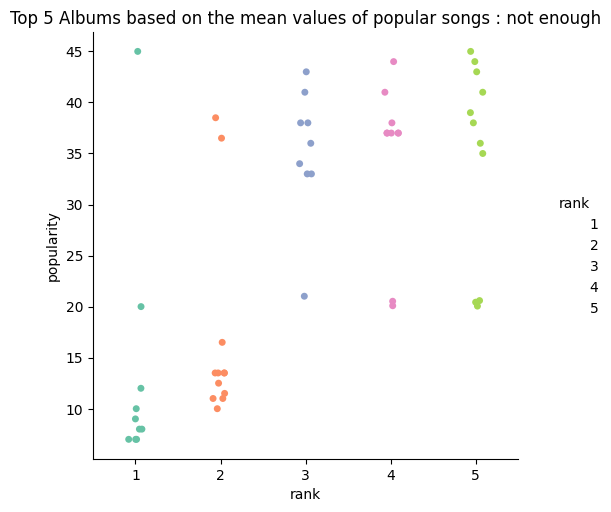

In [90]:
plt.figure(figsize=(7,5))
sns.catplot(data=top5album_by_mean, x='rank', y='popularity', palette='Set2')
plt.title('Top 5 Albums based on the mean values of popular songs : not enough')
plt.show()

In [91]:
top5album_by_songcnt[top5album_by_songcnt['rank']<=2]['album'].unique()

array(['Honk (Deluxe)', 'Goats Head Soup (Deluxe)'], dtype=object)

Above graph shows top 3 albums pick by the mean values of song's popularity is not strong enough to decide the recommendation of albums.

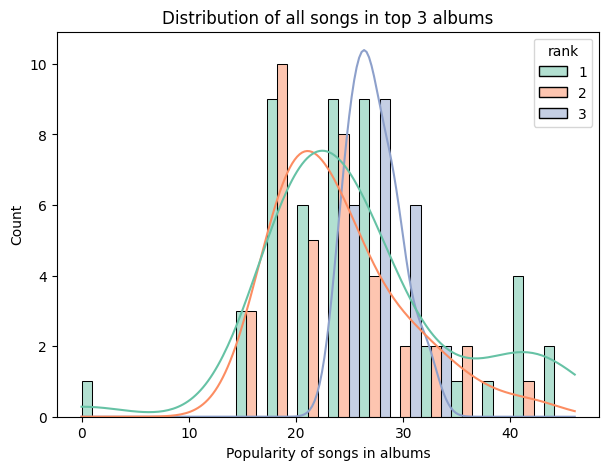

In [92]:
# distribution of popularity for top 3 albums

#print(sns.color_palette("pastel6").as_hex())
top_n = 3
dist_color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']
plt.figure(figsize = (7, 5))
top3album = top5album_by_songcnt[top5album_by_songcnt['rank'] <= top_n]


sns.histplot(data= top3album, x='popularity', hue='rank', multiple='dodge', kde=True, palette='Set2')
plt.title('Distribution of all songs in top {:d} albums'.format(top_n))
plt.xlabel('Popularity of songs in albums')
plt.show()    
    

I can conclude that two albums in the top rank above can be recommended to users.
In visualization, the album which is ranked 3rd, there are some songs with high popularity score (25-30) with high count(10-12), but overall, the songs in the albums which are ranked 1st and 2nd are distributed in wide area, which means it is popular to more people.

Steps to Perform:
o	Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern. 

In [93]:
pair_list =['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','popularity']

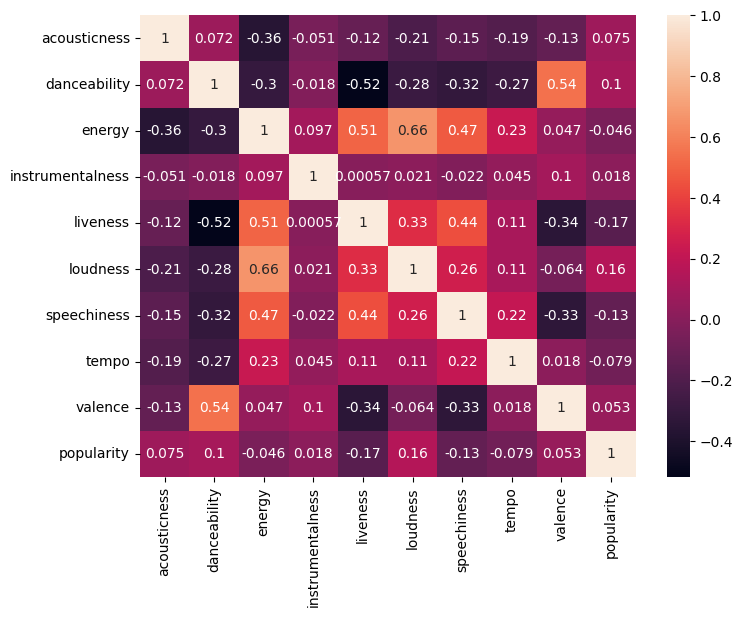

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset[pair_list].corr(), annot=True)
plt.show()

song's loudness has strong positive relationship with energy. Dancibility and liveness has stong negative relationship each other

In [95]:
# compute correlation between features
def get_correlated(data, threshold_lwr, threshold_upr):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j]) > threshold_lwr) & (abs(corr_matrix.iloc[i,j]) <= threshold_upr):
                colname1=corr_matrix.columns[i]
                colname2=corr_matrix.columns[j]
                if corr_matrix.iloc[i,j] > 0 :
                    col_corr.add("+ "+colname1+"~"+colname2)
                else :
                    col_corr.add("- "+colname1+"~"+colname2)
    return col_corr

feature_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

dataset_x = dataset[feature_cols]

print("correlation > 0.3 and <=0.4 :", get_correlated(dataset[feature_cols], 0.3, 0.4))
print("correlation > 0.4 and <=0.5:", get_correlated(dataset[feature_cols], 0.4, 0.5))
print("correlation > 0.5 and <=1:", get_correlated(dataset[feature_cols], 0.5, 1))
print("=> ", get_correlated(dataset[feature_cols], 0.5, 1), "has the strong relationships with each other" )

correlation > 0.3 and <=0.4 : {'- valence~liveness', '- energy~acousticness', '- valence~speechiness', '- speechiness~danceability', '+ loudness~liveness', '- energy~danceability'}
correlation > 0.4 and <=0.5: {'+ speechiness~energy', '+ speechiness~liveness'}
correlation > 0.5 and <=1: {'+ valence~danceability', '+ loudness~energy', '- liveness~danceability', '+ liveness~energy'}
=>  {'+ valence~danceability', '+ loudness~energy', '- liveness~danceability', '+ liveness~energy'} has the strong relationships with each other


In [96]:
dataset.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [97]:
dataset['decade_period'] = dataset['release_date'].dt.year // 10 * 10

<Figure size 400x300 with 0 Axes>

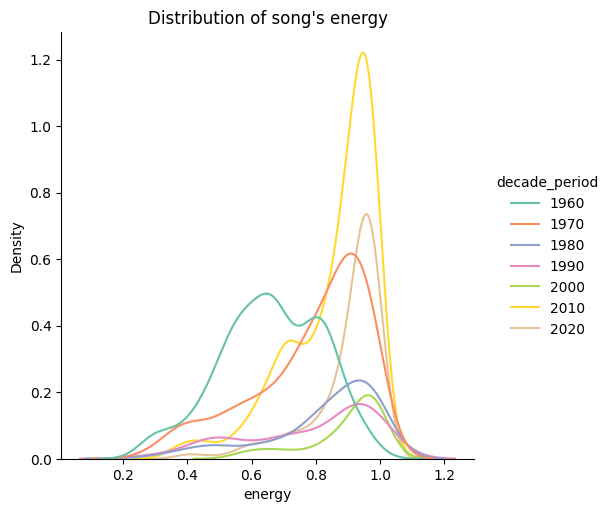

In [98]:
plt.figure(figsize=(4,3))
sns.displot(dataset, x='energy', hue='decade_period', kind='kde', palette='Set2')
plt.title("Distribution of song's energy")
plt.show()

Compared to song's energy in 1960s, the energy of songs peaks and have higest density in 2010s. In 2020s, songs have highest energy in 2020s, which is surprising if considering singers' age in the Rolling Stones.

<Figure size 700x500 with 0 Axes>

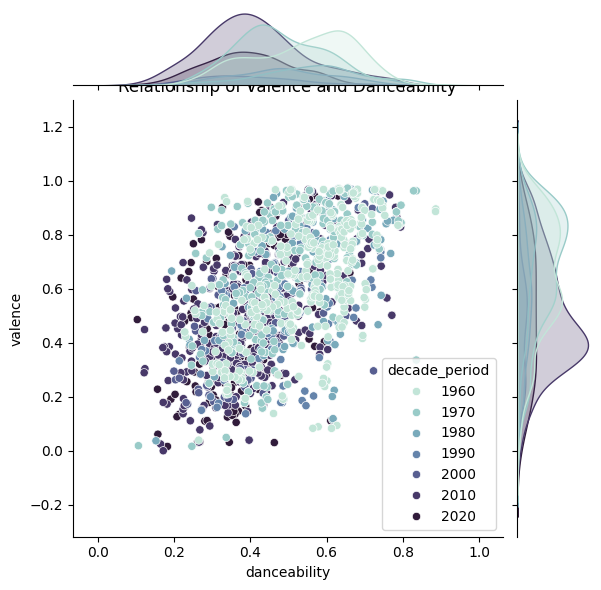

In [99]:
plt.figure(figsize=(7,5))
sns.jointplot(dataset, x='danceability', y='valence', hue='decade_period', 
              palette=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
plt.title("Relationship of valence and Danceability")
plt.show()

It is interesting but natural that valence has strong positive relationship with danceability, which means more danceable songs tends to be more happier. In 1960s and 1970s more happier and danceable songs existed than in 2020s, when there are more sad, depressed or angry, and less danceable songs. But still in 2020s, happier,dancealbe songs exist.

Steps to Perform:
o	Discover how a song's popularity relates to various factors and how this has changed over time.

In [100]:
dataset[pair_list].corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.156980
danceability        0.104748
acousticness        0.074847
valence             0.053243
instrumentalness    0.017777
energy             -0.046453
tempo              -0.078777
speechiness        -0.131212
liveness           -0.173866
Name: popularity, dtype: float64

Song's factors such as 1.loudness, 2.danceability, 3.acousticness, has some relationships with popularity in this order of correlation weight. Examin the relationship using visualization.

In [101]:
print("Unique popularity :", dataset.popularity.unique())
print("popularity mean: {:.2f}", dataset.popularity.mean())
print("popularity max: {:.2f}", dataset.popularity.max())
print("popularity min: {:.2f}", dataset.popularity.min())

Unique popularity : [33.         34.         32.         31.         30.         29.
 27.         28.         26.         25.         24.         39.
 23.         22.         19.         20.         18.         17.
 15.         16.         12.         11.         13.          9.
  8.         10.         21.         35.         42.         37.
 14.         41.         21.01728553 46.         44.         38.
  0.          7.          4.          6.          5.          3.
  2.         43.          1.         45.         36.         48.
 20.40848676 20.73673647 20.05135122 20.59143124 20.43317743 40.
 20.61280588 20.21346288 20.11844234 20.83465108 20.15099612 20.77671507
 20.38249987 20.52534564 20.92771218 20.27267154 20.4572125  20.24339669
 20.08522752 19.94389543 20.30064808 19.5        26.5        14.5
 21.5        15.5        11.5         9.5         8.5         6.5
 13.5        16.5        12.5        36.5        38.5       ]
popularity mean: {:.2f} 19.905447222018424
popularity m

In [102]:
# create new column 'likeness' based on popularity 1:like, 0:not like
dataset['likeness'] = 'Not like'
dataset.loc[dataset[(dataset['popularity'] > dataset['popularity'].mean())].index, 'likeness'] = 'like'

In [103]:
dataset[['popularity', 'likeness']].head()

popularity likeness
0        33.0     like
1        34.0     like
2        34.0     like
3        32.0     like
4        32.0     like

In [104]:
dataset[dataset['likeness'] == 'Not like'][['popularity','likeness']].head()

popularity  likeness
67        19.0  Not like
69        19.0  Not like
70        18.0  Not like
71        18.0  Not like
72        19.0  Not like

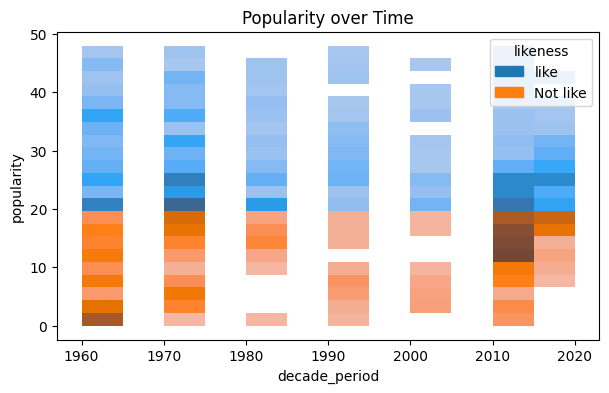

In [105]:
plt.figure(figsize=(7, 4))
sns.histplot(dataset, x='decade_period', y='popularity', hue='likeness', legend=True)
plt.title("Popularity over Time")
plt.show()

I created the column 'likeness' using the mean value of popularity (1: like, 0: not like) and the column 'decade_period' to show the pattern in every decade when it is needed. Above graph shows the songs were more liked in 1960s and 1970s than other years, because the orange color which means being liked is darker when the value of the density is between 30-40 compared to other years, (mean value is around 20.). In 2010s and 2020s, the songs gain more popularity than 1990s and 2000s again, the density of likeness is getting darker when the value is 20-40.

<Figure size 700x400 with 0 Axes>

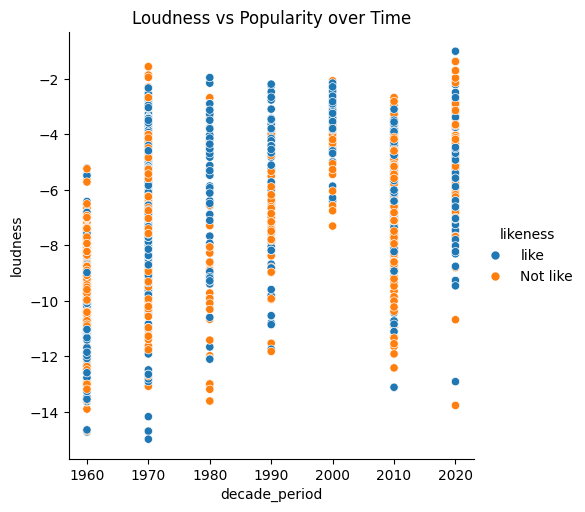

In [106]:
plt.figure(figsize=(7, 4))
sns.relplot(data=dataset, x='decade_period', y='loudness', hue='likeness')

plt.title("Loudness vs Popularity over Time")
plt.show()

If we follow the trend of blus dots which means popular songs, in 1960 quiet songs were popular, in 1970 quiet and
loud songs are similarly distributed between liked and not liked, but a lot of louder songs came out. loud song's poupularity was in increasing trend during 1990s-2000s, and decreasing trend in 2010-2020 even though many louder songs came out in 2020s.

<Figure size 700x400 with 0 Axes>

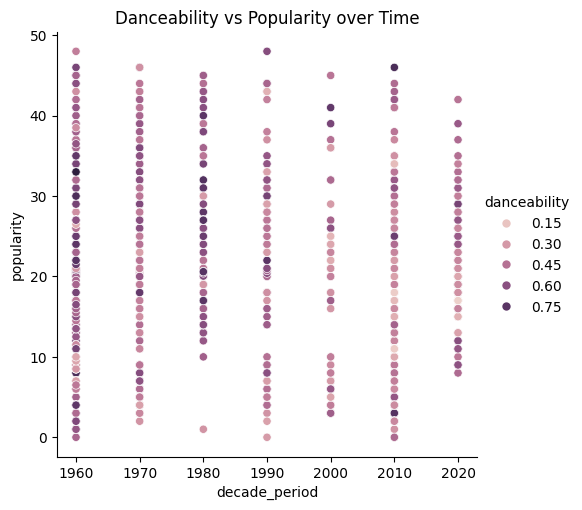

In [107]:
plt.figure(figsize=(7, 4))
sns.relplot(data=dataset, x='decade_period', y='popularity', hue='danceability')
plt.title("Danceability vs Popularity over Time")
plt.show()

There were a lot of danceable songs in 1960s. If we compare in 1960s to in 2020s, in 2020s there are less danceable
songs and danceable ones are less popular.

<Figure size 700x500 with 0 Axes>

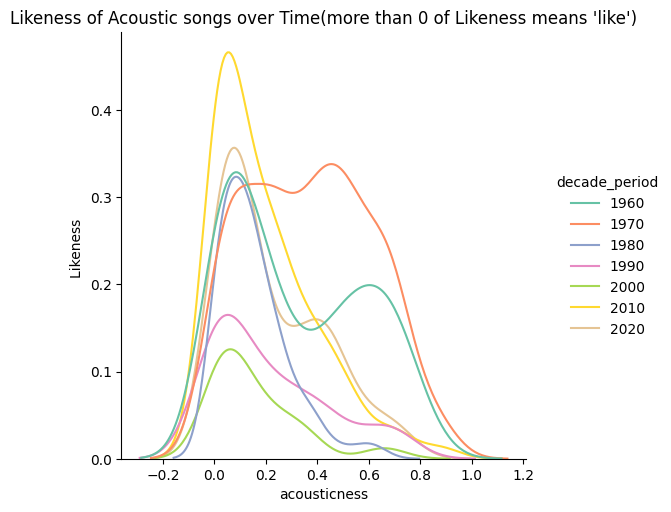

In [108]:
plt.figure(figsize=(7,5))
df_acousticness = dataset[(dataset['likeness'] == 'like')][['decade_period', 'acousticness', 'likeness']]
sns.displot(df_acousticness, x='acousticness', hue='decade_period', kind='kde', palette='Set2')
plt.title("Likeness of Acoustic songs over Time(more than 0 of Likeness means 'like')")
plt.ylabel("Likeness ")
plt.show()

Above visualization shows only popular song's data (the 'Like' value of the column 'likeness' means popularity is 
more than median value of original popularity).
It shows in 1960s non acustic songs becomes more liked than acoustic songs, and acoustic songs becomes less popular, 
becasue the density is peaked between 0.1 and 0.2 which means songs are non acoustic, and second density peak is 
when acousticness is between 0.6 and 0.8.
In 1970s acousticness gets more popular by people than in 1960s. Because the peak dencity is when the acousticness 
is between 0.5 and 07. But between 1980 and 2020, acoustic songs was less liked by people, which makes sense that 
we have more electronic music those times and like them. But In 2020 even though first peak of density is 
when acousticness around 0.2 which means non acoustic, second peak of density is when acousticness is around 0.4. 
So it means acoustic songs are getting more popular than in 2010s. 

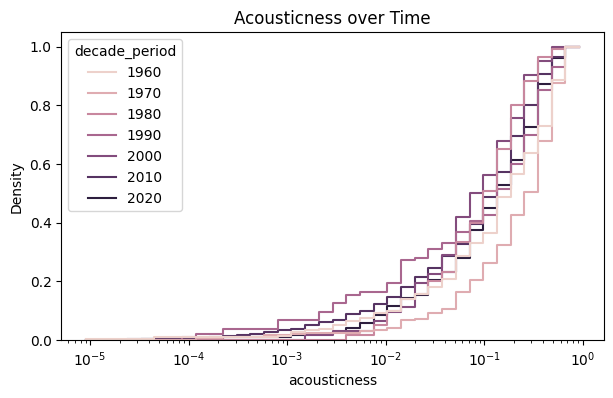

In [109]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=dataset, x="acousticness", hue="decade_period",
    hue_order=['2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)
plt.title("Acousticness over Time")
plt.show()

in 1960-1970, songs were more acoustic than other years.

Steps to Perform:
o	Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.



Steps to Perform:
•	Perform Cluster Analysis:
o	Identify the right number of clusters

In [110]:
dataset.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'decade_period', 'likeness'],
      dtype='object')

In [111]:
# Create a feature set
c_data=dataset.iloc[:, 6:15]

In [112]:
c_data.shape

(1562, 9)

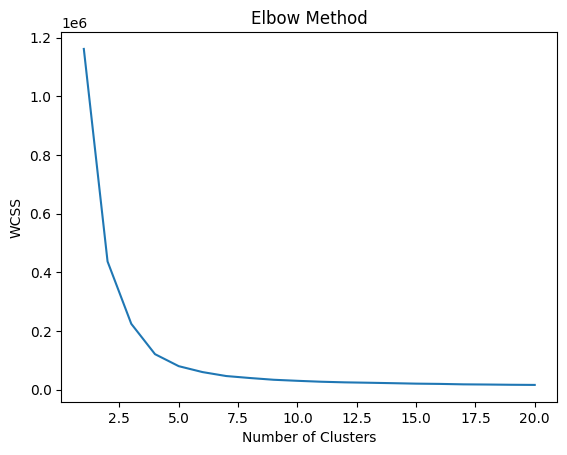

In [113]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Elbow method : assume # of clusters 20
wcss =[]
cluster_cnt = 21
for i in range(1, cluster_cnt) :
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    kmeans.fit(c_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, cluster_cnt), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

3, 4, 5 will be the considerable values for number of clusters

Steps to Perform:
o	Use appropriate clustering algorithm

In [114]:
# scale data for the better result
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm = scaler.fit_transform(c_data)
norm = pd.DataFrame(norm, columns=c_data.columns)

In [115]:
# check for normality of the numeric variables by the Shapiro Wilks test
# H0 : the data is normal
from scipy.stats import shapiro

normality = pd.DataFrame(index=['p-value', 'test-statistic'])
for i in norm.columns :
    normality[i] = shapiro(norm[i])

normality.T

p-value  test-statistic
acousticness      0.899466    8.037926e-31
danceability      0.991732    1.070006e-07
energy            0.893006    1.291877e-31
instrumentalness  0.681187    0.000000e+00
liveness          0.858231    2.460311e-35
loudness          0.969998    1.652878e-17
speechiness       0.883685    1.070758e-32
tempo             0.990652    1.941622e-08
valence           0.975012    7.661847e-16

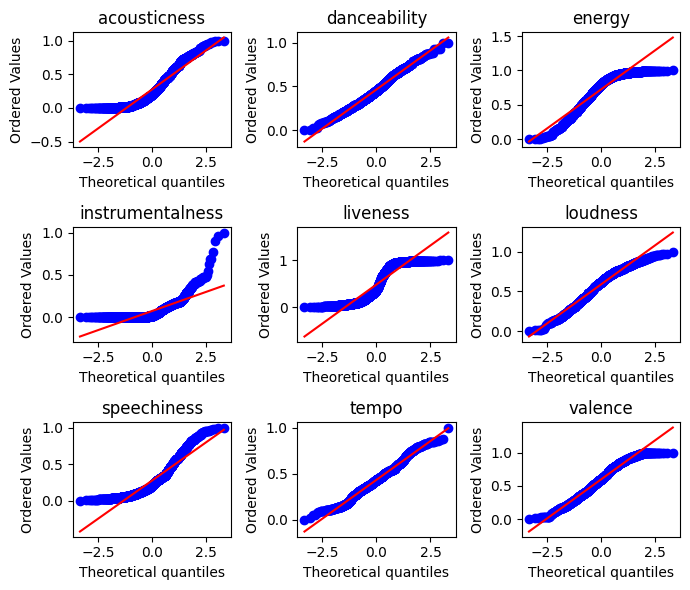

In [116]:
# plot the normality 
from scipy.stats import probplot
plt.figure(figsize=(7,6))
for i, var in enumerate(norm.columns) :
    plt.subplot(3, 3, i+1)
    probplot(norm[var], plot=plt)
    plt.title(f'{var}')
plt.tight_layout()

In [117]:
norm.head()

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.089556      0.459079  0.991747          0.071552  0.932384  0.148368   
1      0.474995      0.283887  0.953232          0.259610  0.962094  0.728815   
2      0.452169      0.360614  0.958735          0.445682  0.956972  0.719296   
3      0.616301      0.338875  0.980743          0.000119  0.894478  0.676424   
4      0.434777      0.254476  0.958735          0.062284  0.967216  0.707701   

   speechiness     tempo   valence  
0     0.629898  0.388968  0.031006  
1     0.382438  0.472806  0.326489  
2     0.666183  0.464150  0.321355  
3     0.319098  0.482396  0.150924  
4     0.506531  0.467060  0.211499

In [118]:
c_data = norm

In [119]:

# Use Kmeans clustering and if the results won't be satisfying I will proceed to Agglomerative Clustering
# I am trying to run algorithm for 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=7)
km_model = kmeans.fit(c_data)

dataset['clusters'] = km_model.predict(c_data).astype('str')
c_data['clusters'] = dataset['clusters']

In [120]:
# visualize the clusters via pairs of variables.
# determine the best number of components to use in order to capture at least 90% of 
# the variability of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=len(c_data.columns)-1)
pca.fit(c_data.iloc[:, :-1])
pca.explained_variance_ratio_

array([0.42658321, 0.18150193, 0.10122484, 0.08809239, 0.06817585,
       0.05960782, 0.02895169, 0.02371414, 0.02214814])

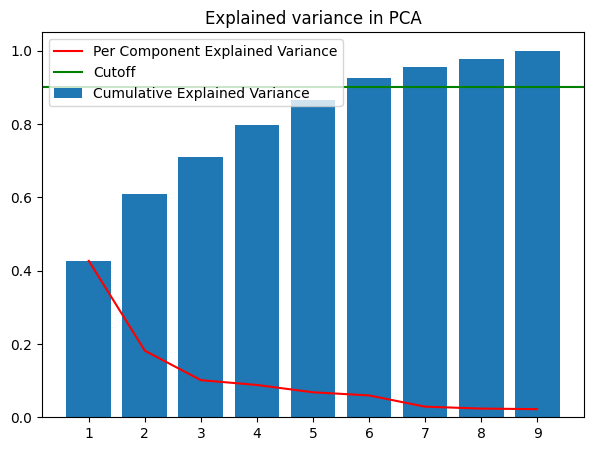

In [121]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,10), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,10))
plt.legend(loc=2)
plt.show()

90% of explained variability reached when I use 6 components. Therefore, implement dimensionality reduction to 6 components

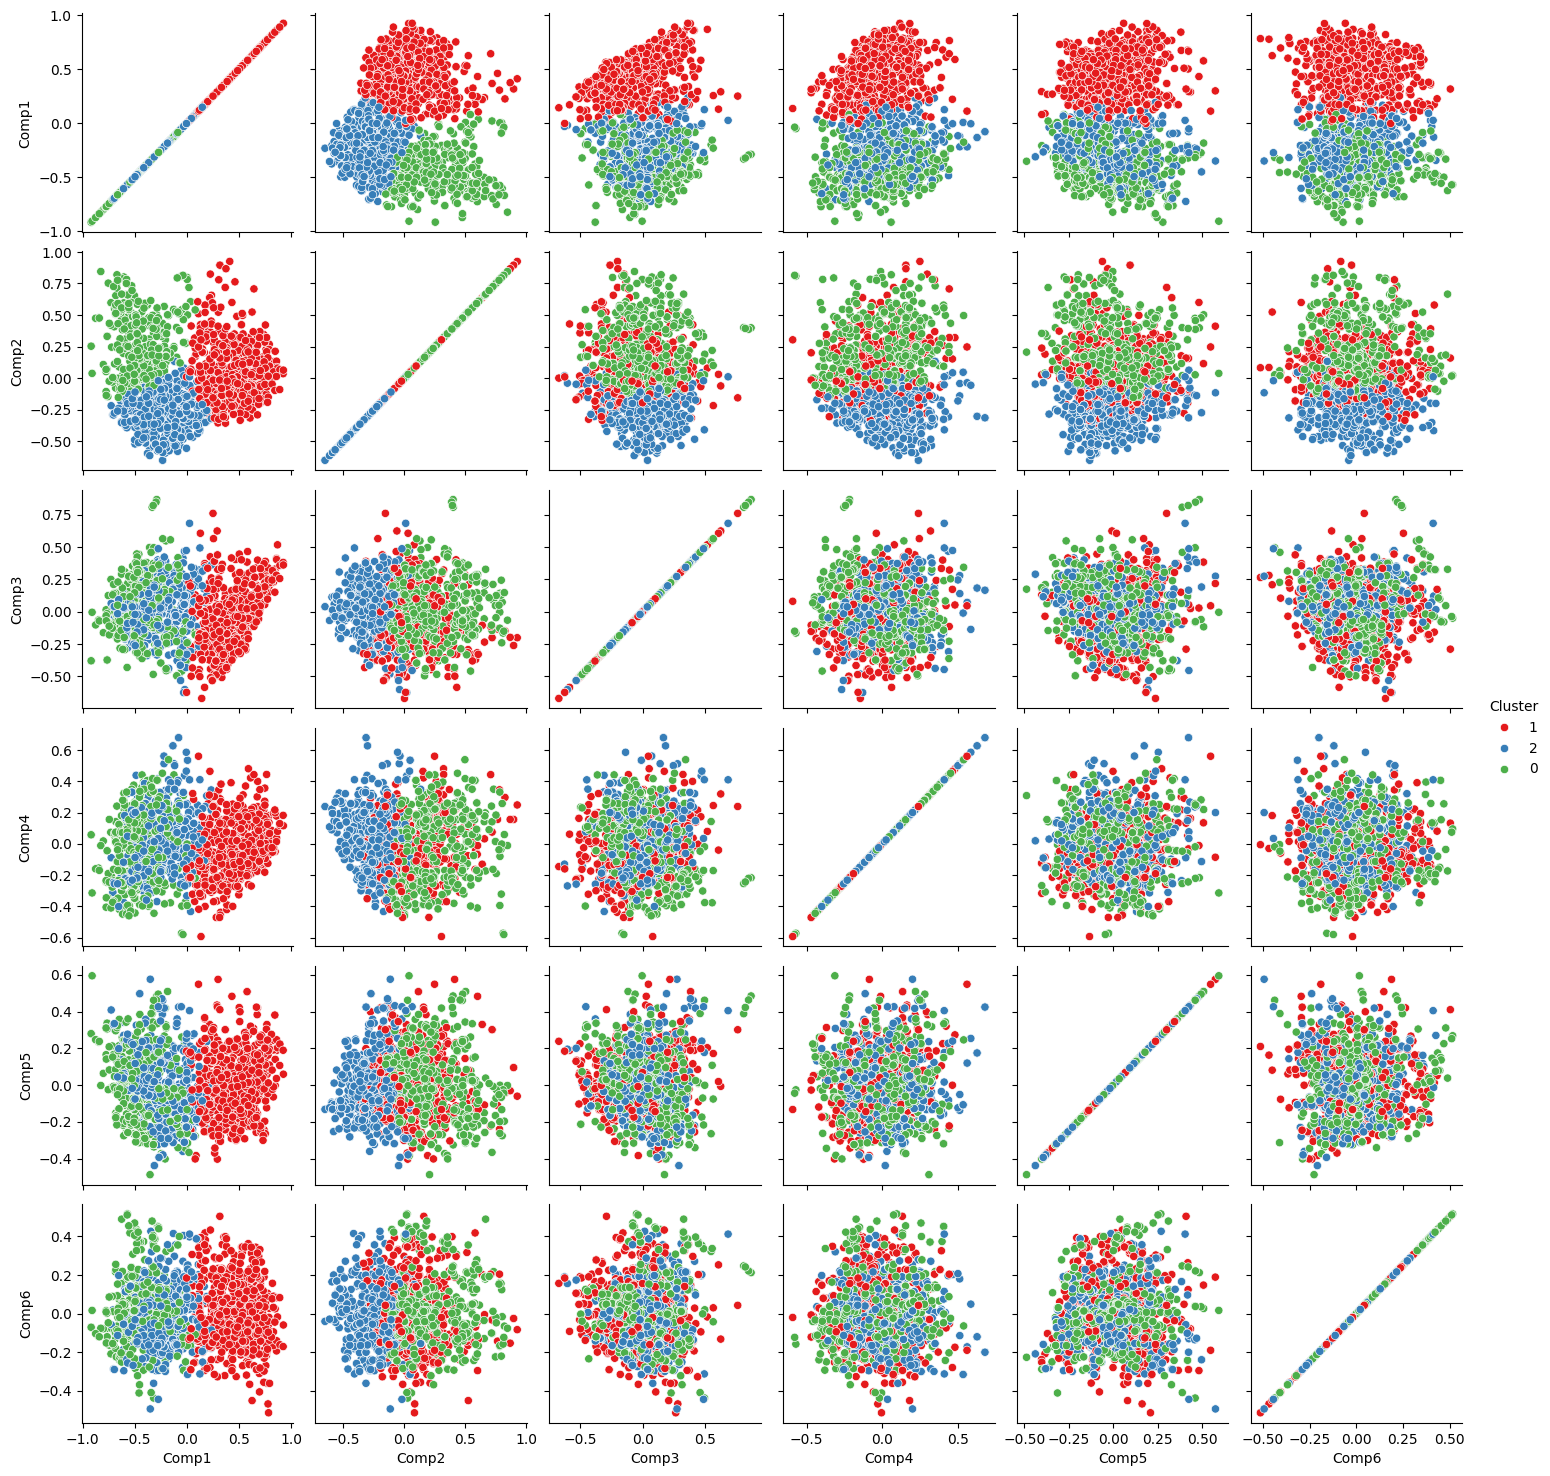

In [122]:
pca=PCA(n_components=6)
reduced=pca.fit_transform(c_data.iloc[:,:-1])

reduced=pd.DataFrame(np.column_stack([reduced, c_data.clusters]), 
                     columns=['Comp1','Comp2','Comp3','Comp4','Comp5', 'Comp6','Cluster'])

sns.pairplot(reduced, hue='Cluster', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

Perform a component reduction to two variables

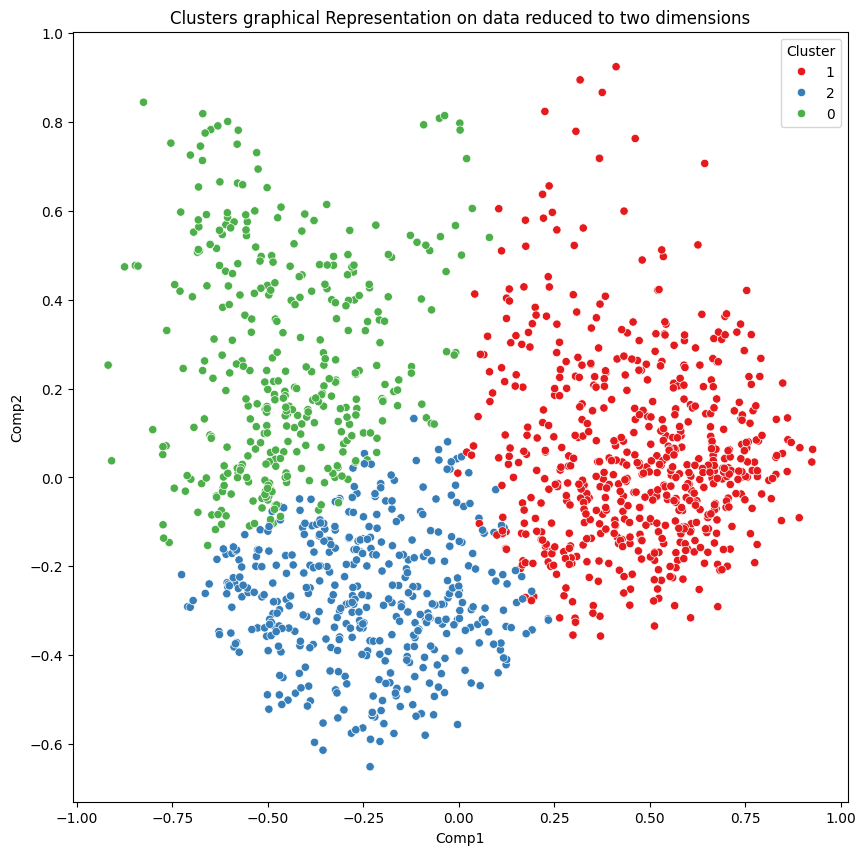

In [123]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(c_data.iloc[:,:-1])
reduced=pd.DataFrame(np.column_stack([reduced, c_data.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced, hue='Cluster', x='Comp1',y='Comp2', palette='Set1')
plt.title('Clusters graphical Representation on data reduced to two dimensions',  fontsize=12)
plt.show()

Try 4 clusters using AgglomerativeClustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

hierarchy=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward', compute_distances=True)

dataset['Hierarchical_clusters']=hierarchy.fit_predict(c_data)

In [125]:
reduced2=pd.DataFrame(np.column_stack([reduced, dataset['Hierarchical_clusters']]), columns=['Comp1','Comp2','Cluster_K_Means','Hierarchical_Clusters'])

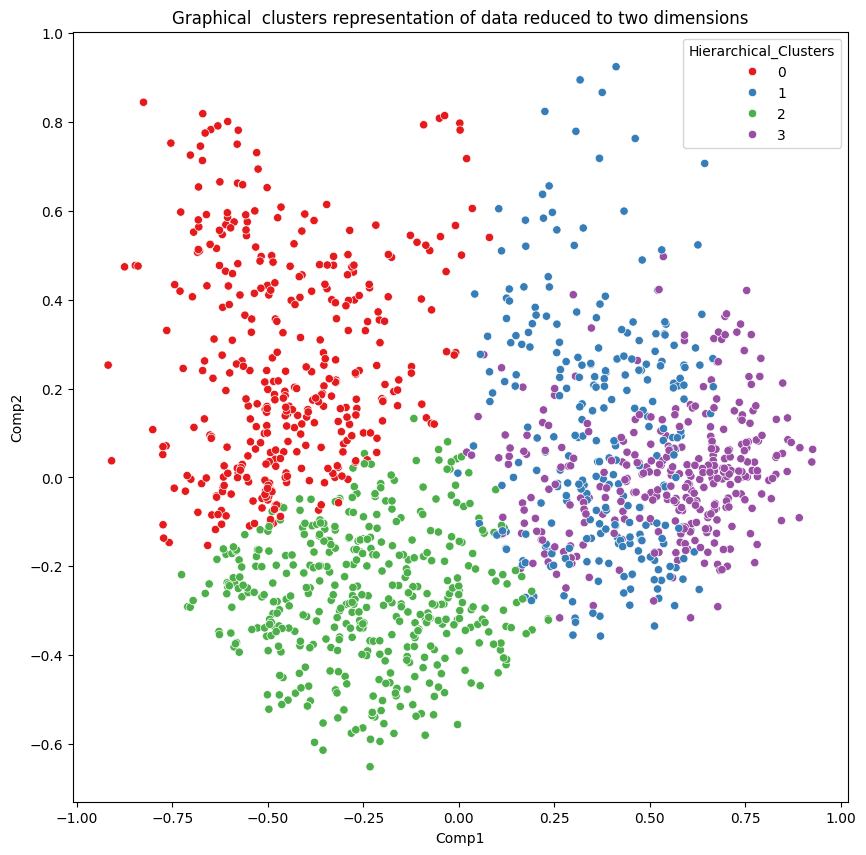

In [126]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced2, hue='Hierarchical_Clusters', x='Comp1',y='Comp2', palette='Set1')
plt.title('Graphical  clusters representation of data reduced to two dimensions',  fontsize=12)
plt.show()

In [127]:
# Try 3 clusters using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

hierarchy=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', compute_distances=True)

dataset['Hierarchical_clusters']=hierarchy.fit_predict(c_data)

In [128]:
reduced2=pd.DataFrame(np.column_stack([reduced, dataset['Hierarchical_clusters']]), columns=['Comp1','Comp2','Cluster_K_Means','Hierarchical_Clusters'])

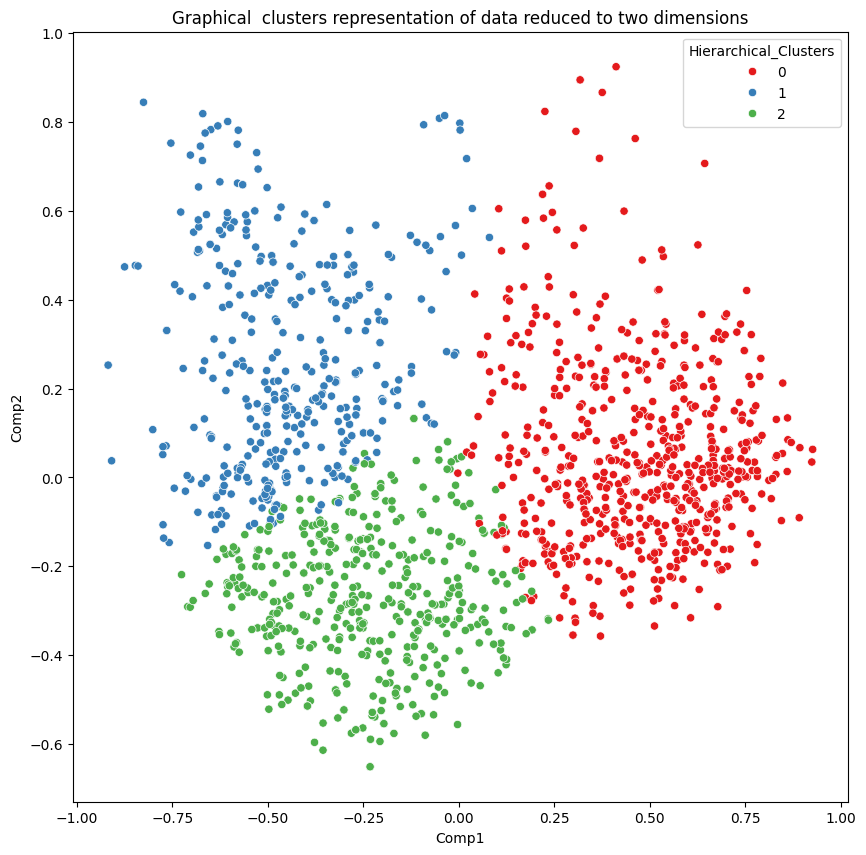

In [129]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced2, hue='Hierarchical_Clusters', x='Comp1',y='Comp2', palette='Set1')
plt.title('Graphical  clusters representation of data reduced to two dimensions',  fontsize=12)
plt.show()

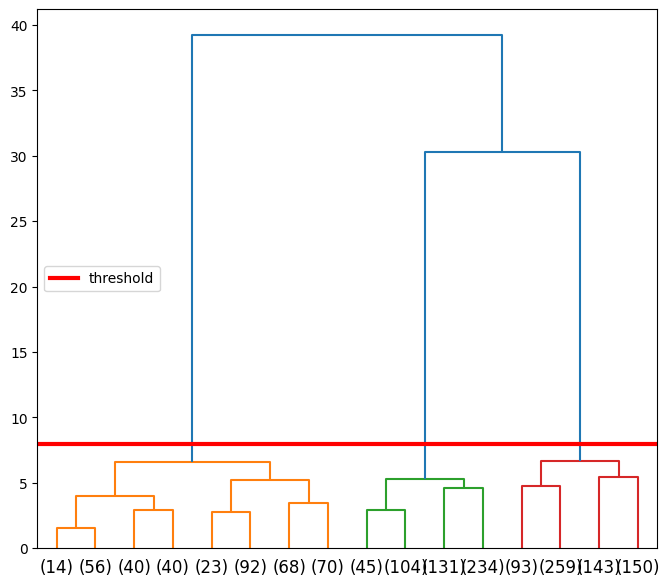

In [130]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(8,7))
dendrogram(linkage(c_data, method='ward'), truncate_mode='level', p=3 )
plt.axhline(y=8, label='threshold', color='red', lw=3)
plt.title='Dendrogram'
plt.legend(loc=6)
plt.show()

Steps to Perform :
o	Define each cluster based on the features

In [131]:
dataset.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'decade_period', 'likeness', 'clusters',
       'Hierarchical_clusters'],
      dtype='object')

In [132]:
dataset['clusters'].value_counts()

clusters
1    645
2    514
0    403
Name: count, dtype: int64

In [133]:
dataset['Hierarchical_clusters'].value_counts()

Hierarchical_clusters
0    645
2    514
1    403
Name: count, dtype: int64

The results of K-means clustering and Hierarchical clustering are same when number of clusters is same as 3

In [134]:
feature_cols =['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
spotify_cohort = dataset.groupby('clusters')[feature_cols].mean()

In [135]:
spotify_cohort

acousticness  danceability    energy  instrumentalness  liveness  \
clusters                                                                     
0             0.433555      0.515746  0.573351          0.044771  0.229234   
1             0.210372      0.378436  0.906712          0.061597  0.869540   
2             0.160520      0.541899  0.836327          0.080942  0.239841   

          loudness  speechiness       tempo   valence  
clusters                                               
0        -9.295950     0.042003  116.837187  0.522102  
1        -5.696579     0.079473  129.657578  0.471059  
2        -6.238777     0.051954  125.315437  0.762097

In [136]:
spotify_cohort = spotify_cohort.reset_index()

In [137]:
spotify_cohort

clusters  acousticness  danceability    energy  instrumentalness  liveness  \
0        0      0.433555      0.515746  0.573351          0.044771  0.229234   
1        1      0.210372      0.378436  0.906712          0.061597  0.869540   
2        2      0.160520      0.541899  0.836327          0.080942  0.239841   

   loudness  speechiness       tempo   valence  
0 -9.295950     0.042003  116.837187  0.522102  
1 -5.696579     0.079473  129.657578  0.471059  
2 -6.238777     0.051954  125.315437  0.762097

In [138]:
spotify_cohort['group_name'] = ""
spotify_cohort

clusters  acousticness  danceability    energy  instrumentalness  liveness  \
0        0      0.433555      0.515746  0.573351          0.044771  0.229234   
1        1      0.210372      0.378436  0.906712          0.061597  0.869540   
2        2      0.160520      0.541899  0.836327          0.080942  0.239841   

   loudness  speechiness       tempo   valence group_name  
0 -9.295950     0.042003  116.837187  0.522102             
1 -5.696579     0.079473  129.657578  0.471059             
2 -6.238777     0.051954  125.315437  0.762097

In [139]:
spotify_cohort.loc[spotify_cohort['clusters']=='0', 'group_characteristic'] = 'Sweet Balad Acoustic cohort-acousticness,slow-tempo,low-energy,low-instrumentalness,quiet'

In [140]:
spotify_cohort.loc[spotify_cohort['clusters']=='1', 'group_characteristic'] = 'Powerful Energy Live cohort-speechiness,live,energy,loud, fast-tempo, low-valence'

In [141]:
spotify_cohort.loc[spotify_cohort['clusters']=='2', 'group_characteristic'] = 'Happy upbeat dancing cohort-danceability,instrumentalness,high-valence'

In [142]:
#spotify_cohort = spotify_cohort.set_index('clusters')

In [143]:
for i in range(len(spotify_cohort['group_characteristic'])) :
    print ("Group {:d}: {:s}".format(i, spotify_cohort.loc[i, 'group_characteristic']))

Group 0: Sweet Balad Acoustic cohort-acousticness,slow-tempo,low-energy,low-instrumentalness,quiet
Group 1: Powerful Energy Live cohort-speechiness,live,energy,loud, fast-tempo, low-valence
Group 2: Happy upbeat dancing cohort-danceability,instrumentalness,high-valence


correlation > 0.3 and <=0.4 : {'- speechiness~danceability', '- energy~danceability', '- valence~liveness', '- valence~speechiness', '- energy~acousticness', '+ loudness~liveness'}
correlation > 0.4 and <=0.5: {'+ speechiness~liveness', '+ speechiness~energy'}
correlation > 0.5 and <=1: {'+ loudness~energy', '+ valence~danceability', '- liveness~danceability', '+ liveness~energy'}
=>  {'+ loudness~energy', '+ valence~danceability', '- liveness~danceability', '+ liveness~energy'} has the strong relationships with each other